In [3]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException
import time
import pandas as pd
import os  


service = Service()
options = webdriver.ChromeOptions()

driver = webdriver.Chrome(service=service, options=options)


charList = [
    "Action", "Adventure", "Comedy", "Crime", 
    "Drama", "Family", "Horror", 
    "Musical", "Mystery", "Romance"
]


film_names = []


existing_films = []


for char in charList:
    url = f"https://imsdb.com/genre/{char}"
    driver.get(url)
    time.sleep(1)  

    paragraphs = driver.find_elements(By.TAG_NAME, "p")
    count = 0  
    for p in paragraphs:
        if count >= 7:  
            break
        try:
            a = p.find_element(By.TAG_NAME, "a")
            name = a.text.strip().replace(" ", "-")  
            
            
            if name not in existing_films:
                film_names.append(name)      
                existing_films.append(name)  
                count += 1
        except:
            continue


header = ["Film", "Script"]


csv_file = "D:/YapayZekaÖdevi/imsdb_senaryolar.csv"


if not os.path.exists(csv_file):
    df = pd.DataFrame(columns=header)
    df.to_csv(csv_file, mode='w', header=True, index=False, encoding="utf-8")


for name in film_names:
    url = f"https://imsdb.com/scripts/{name}.html"
    driver.get(url)
    time.sleep(2)
    try:
        content = driver.find_element(By.XPATH, "/html/body/table[2]/tbody/tr/td[3]/table/tbody/tr/td/pre").text
        
        
        df = pd.DataFrame([(name, content)], columns=header)
        df.to_csv(csv_file, mode='a', header=False, index=False, encoding="utf-8")

        print(f"{name} ✔️")  
    except NoSuchElementException:
        print(f"{name} ❌ Not found or no script")    
        continue


driver.quit()

print("CSV dosyasına veriler kaydedildi.")


15-Minutes ✔️
2012 ✔️
30-Minutes-or-Less ✔️
48-Hrs. ✔️
A-Most-Violent-Year ✔️
Above-the-Law ✔️
Abyss,-The ✔️
127-Hours ✔️
1492:-Conquest-of-Paradise ✔️
2001:-A-Space-Odyssey ✔️
9 ✔️
A.I. ❌ Not found or no script
Ad-Astra ✔️
Adventures-of-Buckaroo-Banzai-Across-the-Eighth-Dimension,-The ✔️
10-Things-I-Hate-About-You ✔️
12 ✔️
17-Again ✔️
20th-Century-Women ✔️
50-50 ✔️
500-Days-of-Summer ✔️
A-Real-Pain ✔️
25th-Hour ❌ Not found or no script
44-Inch-Chest ✔️
A-Few-Good-Men ✔️
A-Prayer-Before-Dawn ✔️
A-Scanner-Darkly ✔️
Absolute-Power ✔️
Alien-Nation ✔️
12-and-Holding ✔️
12-Monkeys ✔️
12-Years-a-Slave ✔️
187 ✔️
28-Days-Later ✔️
42 ✔️
8-Mile ✔️
Addams-Family,-The ✔️
Aladdin ✔️
Anastasia ✔️
Back-to-the-Future ✔️
Back-to-the-Future-II-&-III ✔️
Beauty-and-the-Beast ✔️
Big ✔️
A-Quiet-Place ✔️
After.Life ✔️
Alien ✔️
Alien-3 ✔️
Alien-vs.-Predator ✔️
Alien:-Resurrection ✔️
Aliens ✔️
Burlesque ✔️
Color-Purple,-The ✔️
Corpse-Bride ✔️
Detroit-Rock-City ✔️
Duck-Soup ✔️
Honeydripper ✔️
La-La-Land ✔️
8MM 

In [21]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')       
nltk.download('omw-1.4')       
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yusuf\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yusuf\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\yusuf\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\yusuf\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\yusuf\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [22]:

df = pd.read_csv("D:/YapayZekaÖdevi/imsdb_senaryolar.csv")


df.head()

,Film,Script
0,15-Minutes,FADE IN\n\n on the words CZECH AIRLINE. We a...
1,2012,\n \n \n ...
2,30-Minutes-or-Less,30 MINUTES OR...
3,48-Hrs.,FADE IN:\n\n OPEN C...
4,A-Most-Violent-Year,A MOST VIOLEN...


In [23]:
import pandas as pd

df = pd.read_csv("D:/YapayZekaÖdevi/imsdb_senaryolar.csv")
print(df.columns)


Index(['Film', 'Script'], dtype='object')


In [24]:
def temizle_ve_tokenize(metin):
    
    if pd.isna(metin):
        return []
    
    
    metin = metin.lower()
    
    metin = re.sub(r'[^\w\s]', '', metin)
    
    metin = re.sub(r'\d+', '', metin)
    
    tokens = word_tokenize(metin)
    
    stop_words = set(stopwords.words('english'))
    tokens = [kelime for kelime in tokens if kelime not in stop_words]
    
    return tokens


In [25]:
df["temizlenmis_tokenler"] = df["Script"].astype(str).apply(temizle_ve_tokenize)


In [26]:

from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

def lemmatize_et(token_list):
    return [lemmatizer.lemmatize(token) for token in token_list]

df['lemmatized_tokens'] = df['temizlenmis_tokenler'].apply(lemmatize_et)


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\yusuf\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [27]:

from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

def stem_et(token_list):
    return [stemmer.stem(token) for token in token_list]

df['stemmed_tokens'] = df['temizlenmis_tokenler'].apply(stem_et)


In [28]:
df.to_csv('D:/YapayZekaÖdevi/imsdb_senaryolar_onislenmis.csv', index=False)


In [29]:
from nltk.stem import WordNetLemmatizer, PorterStemmer
import nltk
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

def lemmatize_et(token_list):
    return [lemmatizer.lemmatize(token) for token in token_list]

def stem_et(token_list):
    return [stemmer.stem(token) for token in token_list]

df['lemmatized_tokens'] = df['temizlenmis_tokenler'].apply(lemmatize_et)
df['stemmed_tokens'] = df['temizlenmis_tokenler'].apply(stem_et)


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\yusuf\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [30]:

df_lemmas = df[['lemmatized_tokens']].copy()

df_lemmas['lemmatized_tokens'] = df_lemmas['lemmatized_tokens'].apply(lambda x: ' '.join(x))
df_lemmas.to_csv('D:/YapayZekaÖdevi/imsdb_senaryolar_lemmatized.csv', index=False)


df_stems = df[['stemmed_tokens']].copy()
df_stems['stemmed_tokens'] = df_stems['stemmed_tokens'].apply(lambda x: ' '.join(x))
df_stems.to_csv('D:/YapayZekaÖdevi/imsdb_senaryolar_stemmed.csv', index=False)


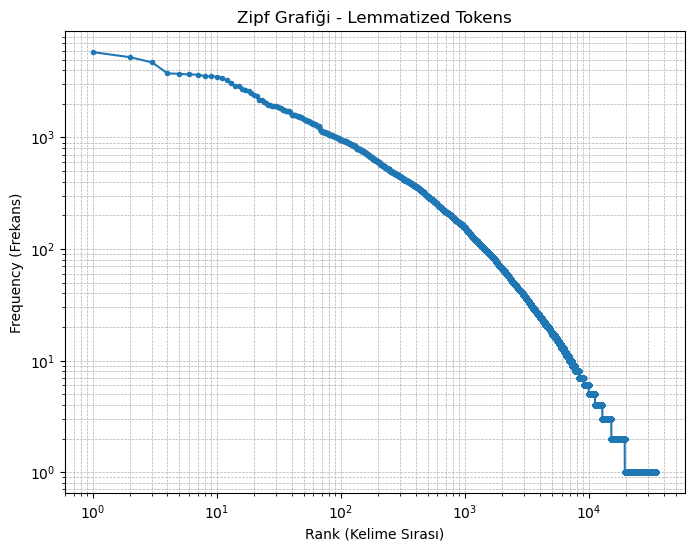

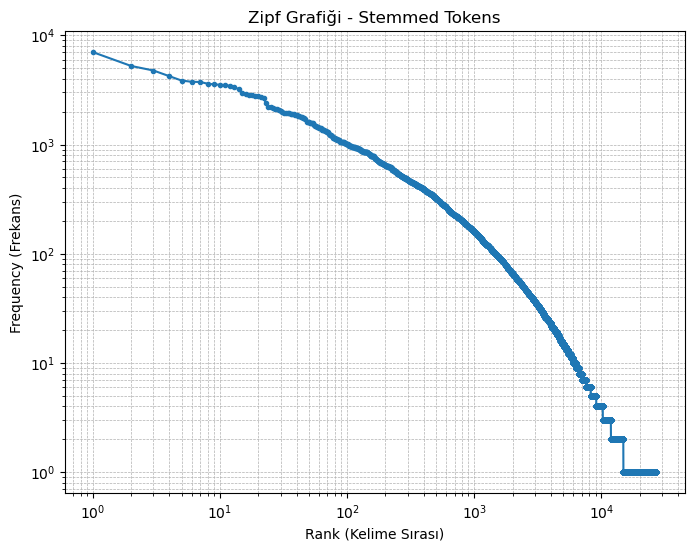

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

def zipf_plot(file_path, column_name, title):
    
    df = pd.read_csv(file_path)
    
    
    all_words = ' '.join(df[column_name].astype(str)).split()
    
    
    word_counts = Counter(all_words)
    
    
    freqs = np.array(sorted(word_counts.values(), reverse=True))
    
    ranks = np.arange(1, len(freqs) + 1)
    
    
    plt.figure(figsize=(8,6))
    plt.loglog(ranks, freqs, marker=".")
    plt.title(title)
    plt.xlabel("Rank (Kelime Sırası)")
    plt.ylabel("Frequency (Frekans)")
    plt.grid(True, which="both", ls="--", lw=0.5)
    plt.show()


zipf_plot('D:/YapayZekaÖdevi/imsdb_senaryolar_lemmatized.csv', 'lemmatized_tokens', 'Zipf Grafiği - Lemmatized Tokens')


zipf_plot('D:/YapayZekaÖdevi/imsdb_senaryolar_stemmed.csv', 'stemmed_tokens', 'Zipf Grafiği - Stemmed Tokens')


In [32]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

In [33]:
def tfidf_uygula(df, metin_sutunu, csv_cikisi):
    
    vectorizer = TfidfVectorizer()
    
    
    metinler = df[metin_sutunu].astype(str)
    
    
    tfidf_matris = vectorizer.fit_transform(metinler)
    
    
    df_tfidf = pd.DataFrame(tfidf_matris.toarray(), columns=vectorizer.get_feature_names_out())
    
    
    df_tfidf.to_csv(csv_cikisi, index=False)

In [34]:

df_lemmas = pd.read_csv('D:/YapayZekaÖdevi/imsdb_senaryolar_lemmatized.csv')


df_stems = pd.read_csv('D:/YapayZekaÖdevi/imsdb_senaryolar_stemmed.csv')


tfidf_uygula(df_lemmas, 'lemmatized_tokens', 'D:/YapayZekaÖdevi/imsdb_senaryolar_lemmatized_tfidf.csv')
tfidf_uygula(df_stems, 'stemmed_tokens', 'D:/YapayZekaÖdevi/imsdb_senaryolar_stemmed_tfidf.csv')

In [40]:
import os
import pandas as pd
from gensim.models import Word2Vec
import multiprocessing

model_dir = 'D:/YapayZekaÖdevi/models'
os.makedirs(model_dir, exist_ok=True)  

parameters = [
    {'model_type': 'cbow', 'window': 2, 'vector_size': 100},
    {'model_type': 'skipgram', 'window': 2, 'vector_size': 100},
    {'model_type': 'cbow', 'window': 4, 'vector_size': 100},
    {'model_type': 'skipgram', 'window': 4, 'vector_size': 100},
    {'model_type': 'cbow', 'window': 2, 'vector_size': 300},
    {'model_type': 'skipgram', 'window': 2, 'vector_size': 300},
    {'model_type': 'cbow', 'window': 4, 'vector_size': 300},
    {'model_type': 'skipgram', 'window': 4, 'vector_size': 300}
]

def train_word2vec(sentences, model_type, window, vector_size, save_path):
    sg = 1 if model_type == 'skipgram' else 0
    model = Word2Vec(
        sentences=sentences,
        vector_size=vector_size,
        window=window,
        sg=sg,
        workers=multiprocessing.cpu_count(),
        min_count=2,
        epochs=10,
        seed=42
    )
    model.save(save_path)
    print(f'Model kaydedildi: {save_path}')

lemma_path = 'D:/YapayZekaÖdevi/imsdb_senaryolar_lemmatized.csv'
stem_path = 'D:/YapayZekaÖdevi/imsdb_senaryolar_stemmed.csv'

df_lemmas = pd.read_csv(lemma_path)
df_stems = pd.read_csv(stem_path)

df_lemmas['lemmatized_tokens'] = df_lemmas['lemmatized_tokens'].astype(str).apply(lambda x: x.split())
df_stems['stemmed_tokens'] = df_stems['stemmed_tokens'].astype(str).apply(lambda x: x.split())

for param in parameters:
    save_path_lemma = os.path.join(model_dir, f'lemmatized_w2v_{param["model_type"]}_win{param["window"]}_vec{param["vector_size"]}.model')
    train_word2vec(
        sentences=df_lemmas['lemmatized_tokens'].tolist(),
        model_type=param['model_type'],
        window=param['window'],
        vector_size=param['vector_size'],
        save_path=save_path_lemma
    )

for param in parameters:
    save_path_stem = os.path.join(model_dir, f'stemmed_w2v_{param["model_type"]}_win{param["window"]}_vec{param["vector_size"]}.model')
    train_word2vec(
        sentences=df_stems['stemmed_tokens'].tolist(),
        model_type=param['model_type'],
        window=param['window'],
        vector_size=param['vector_size'],
        save_path=save_path_stem
    )


Model kaydedildi: D:/YapayZekaÖdevi/models\lemmatized_w2v_cbow_win2_vec100.model
Model kaydedildi: D:/YapayZekaÖdevi/models\lemmatized_w2v_skipgram_win2_vec100.model
Model kaydedildi: D:/YapayZekaÖdevi/models\lemmatized_w2v_cbow_win4_vec100.model
Model kaydedildi: D:/YapayZekaÖdevi/models\lemmatized_w2v_skipgram_win4_vec100.model
Model kaydedildi: D:/YapayZekaÖdevi/models\lemmatized_w2v_cbow_win2_vec300.model
Model kaydedildi: D:/YapayZekaÖdevi/models\lemmatized_w2v_skipgram_win2_vec300.model
Model kaydedildi: D:/YapayZekaÖdevi/models\lemmatized_w2v_cbow_win4_vec300.model
Model kaydedildi: D:/YapayZekaÖdevi/models\lemmatized_w2v_skipgram_win4_vec300.model
Model kaydedildi: D:/YapayZekaÖdevi/models\stemmed_w2v_cbow_win2_vec100.model
Model kaydedildi: D:/YapayZekaÖdevi/models\stemmed_w2v_skipgram_win2_vec100.model
Model kaydedildi: D:/YapayZekaÖdevi/models\stemmed_w2v_cbow_win4_vec100.model
Model kaydedildi: D:/YapayZekaÖdevi/models\stemmed_w2v_skipgram_win4_vec100.model
Model kaydedildi

In [41]:
from gensim.models import Word2Vec


model_path = 'D:/YapayZekaÖdevi/models/lemmatized_w2v_cbow_win4_vec300.model'


model = Word2Vec.load(model_path)


print(model.wv.most_similar('love'))  


[('sweet', 0.814521074295044), ('marry', 0.8085365295410156), ('lifeguard', 0.798684298992157), ('happy', 0.7929724454879761), ('hate', 0.7924622893333435), ('spinach', 0.7859798669815063), ('sick', 0.7855473756790161), ('bridesmaid', 0.7828893065452576), ('isi', 0.7828812003135681), ('hope', 0.7820047736167908)]


In [76]:
#ÖDEVİN İKİNCİ KISMI

In [80]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer


lemmatized_path = "D:/YapayZekaÖdevi/imsdb_senaryolar_lemmatized.csv"
stemmed_path = "D:/YapayZekaÖdevi/imsdb_senaryolar_stemmed.csv"


tfidf_lem_output = "D:/YapayZekaÖdevi/imsdb_senaryolar_lemmatized_tfidf2.csv"
tfidf_stem_output = "D:/YapayZekaÖdevi/imsdb_senaryolar_stemmed_tfidf2.csv"


df_lem = pd.read_csv(lemmatized_path)
texts_lem = df_lem['lemmatized_tokens'].astype(str).tolist()

vectorizer_lem = TfidfVectorizer()
tfidf_matrix_lem = vectorizer_lem.fit_transform(texts_lem)


df_tfidf_lem = pd.DataFrame(tfidf_matrix_lem.toarray(), columns=vectorizer_lem.get_feature_names_out())


df_tfidf_lem.to_csv(tfidf_lem_output, index=False)
print("Lemmatized TF-IDF CSV kaydedildi.")


df_stem = pd.read_csv(stemmed_path)
texts_stem = df_stem['stemmed_tokens'].astype(str).tolist()

vectorizer_stem = TfidfVectorizer()
tfidf_matrix_stem = vectorizer_stem.fit_transform(texts_stem)

df_tfidf_stem = pd.DataFrame(tfidf_matrix_stem.toarray(), columns=vectorizer_stem.get_feature_names_out())

df_tfidf_stem.to_csv(tfidf_stem_output, index=False)
print("Stemmed TF-IDF CSV kaydedildi.")


Lemmatized TF-IDF CSV kaydedildi.
Stemmed TF-IDF CSV kaydedildi.


In [81]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np


def load_tfidf_csv(path):
    df = pd.read_csv(path, index_col=0)  
    return df


def create_query_vector(df, query_tokens):
    vocab = df.columns.tolist()
    vec = np.zeros(len(vocab))
    token_counts = {token: query_tokens.count(token) for token in set(query_tokens)}
    for i, word in enumerate(vocab):
        if word in token_counts:
            vec[i] = token_counts[word]
    return vec.reshape(1, -1)


def find_top_similar(df, query_vec, top_n=5):
    similarities = cosine_similarity(df.values, query_vec).flatten()
    top_indices = similarities.argsort()[::-1][:top_n]
    top_scores = similarities[top_indices]
    return top_indices, top_scores


query_text = "written month stay emil flip rest passport blank page emil contd six month visa"
query_tokens = query_text.split()


tfidf_lem_path = "D:/YapayZekaÖdevi/imsdb_senaryolar_lemmatized_tfidf2.csv"
tfidf_stem_path = "D:/YapayZekaÖdevi/imsdb_senaryolar_stemmed_tfidf2.csv"


df_lemmatized = load_tfidf_csv(tfidf_lem_path)
df_stemmed = load_tfidf_csv(tfidf_stem_path)


query_vec_lem = create_query_vector(df_lemmatized, query_tokens)
query_vec_stem = create_query_vector(df_stemmed, query_tokens)


top_idx_lem, top_scores_lem = find_top_similar(df_lemmatized, query_vec_lem)
top_idx_stem, top_scores_stem = find_top_similar(df_stemmed, query_vec_stem)

print("Lemmatized TF-IDF - En benzer 5 metin:")
for rank, (idx, score) in enumerate(zip(top_idx_lem, top_scores_lem), 1):
    print(f"{rank}. Metin indeksi: {idx}, Benzerlik skoru: {score:.4f}")

print("\nStemmed TF-IDF - En benzer 5 metin:")
for rank, (idx, score) in enumerate(zip(top_idx_stem, top_scores_stem), 1):
    print(f"{rank}. Metin indeksi: {idx}, Benzerlik skoru: {score:.4f}")


Lemmatized TF-IDF - En benzer 5 metin:
1. Metin indeksi: 0, Benzerlik skoru: 0.2690
2. Metin indeksi: 10, Benzerlik skoru: 0.0489
3. Metin indeksi: 67, Benzerlik skoru: 0.0309
4. Metin indeksi: 26, Benzerlik skoru: 0.0293
5. Metin indeksi: 1, Benzerlik skoru: 0.0262

Stemmed TF-IDF - En benzer 5 metin:
1. Metin indeksi: 0, Benzerlik skoru: 0.2737
2. Metin indeksi: 10, Benzerlik skoru: 0.0483
3. Metin indeksi: 26, Benzerlik skoru: 0.0334
4. Metin indeksi: 67, Benzerlik skoru: 0.0316
5. Metin indeksi: 38, Benzerlik skoru: 0.0291


In [92]:
import pandas as pd

df_lemma = pd.read_csv("D:/YapayZekaÖdevi/imsdb_senaryolar_lemmatized.csv")
print(df_lemma.columns)

df_stem = pd.read_csv("D:/YapayZekaÖdevi/imsdb_senaryolar_stemmed.csv")
print(df_stem.columns)


Index(['lemmatized_tokens'], dtype='object')
Index(['stemmed_tokens'], dtype='object')


In [93]:
import pandas as pd
import gensim
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity


lemma_csv_path = "D:/YapayZekaÖdevi/imsdb_senaryolar_lemmatized.csv"
stem_csv_path = "D:/YapayZekaÖdevi/imsdb_senaryolar_stemmed.csv"
model_folder = "D:/YapayZekaÖdevi/models/"


lemma_models = [
    "lemmatized_w2v_cbow_win2_vec100.model",
    "lemmatized_w2v_skipgram_win2_vec100.model",
    "lemmatized_w2v_cbow_win4_vec100.model",
    "lemmatized_w2v_skipgram_win4_vec100.model",
    "lemmatized_w2v_cbow_win2_vec300.model",
    "lemmatized_w2v_skipgram_win2_vec300.model",
    "lemmatized_w2v_cbow_win4_vec300.model",
    "lemmatized_w2v_skipgram_win4_vec300.model"
]

stem_models = [
    "stemmed_w2v_cbow_win2_vec100.model",
    "stemmed_w2v_skipgram_win2_vec100.model",
    "stemmed_w2v_cbow_win4_vec100.model",
    "stemmed_w2v_skipgram_win4_vec100.model",
    "stemmed_w2v_cbow_win2_vec300.model",
    "stemmed_w2v_skipgram_win2_vec300.model",
    "stemmed_w2v_cbow_win4_vec300.model",
    "stemmed_w2v_skipgram_win4_vec300.model"
]


df_lemma = pd.read_csv(lemma_csv_path)
df_stem = pd.read_csv(stem_csv_path)


texts_lemma = df_lemma['lemmatized_tokens'].astype(str).tolist()
texts_stem = df_stem['stemmed_tokens'].astype(str).tolist()

def sentence_vector(model, sentence_tokens):
    vectors = []
    for token in sentence_tokens:
        if token in model.wv:
            vectors.append(model.wv[token])
    if len(vectors) == 0:
        
        return np.zeros(model.vector_size)
    return np.mean(vectors, axis=0)

def find_top_similar_sentences(model, texts, query, top_n=5):
    
    query_tokens = query.lower().split()
    query_vec = sentence_vector(model, query_tokens)

    all_vecs = []
    for text in texts:
        tokens = text.lower().split()
        vec = sentence_vector(model, tokens)
        all_vecs.append(vec)

    all_vecs = np.array(all_vecs)
    query_vec = query_vec.reshape(1, -1)

    similarities = cosine_similarity(all_vecs, query_vec).flatten()
    top_indices = similarities.argsort()[::-1][:top_n]

    return [(idx, similarities[idx]) for idx in top_indices]


query = "written month stay emil flip rest passport blank page emil contd six month visa"


print("Lemmatized Word2Vec Modelleri - En benzer 5 metin:")
for model_name in lemma_models:
    model_path = model_folder + model_name
    model = gensim.models.Word2Vec.load(model_path)
    top_similar = find_top_similar_sentences(model, texts_lemma, query)
    print(f"\nModel: {model_name}")
    for rank, (idx, score) in enumerate(top_similar, 1):
        print(f"{rank}. Metin indeksi: {idx}, Benzerlik skoru: {score:.4f}")


print("\nStemmed Word2Vec Modelleri - En benzer 5 metin:")
for model_name in stem_models:
    model_path = model_folder + model_name
    model = gensim.models.Word2Vec.load(model_path)
    top_similar = find_top_similar_sentences(model, texts_stem, query)
    print(f"\nModel: {model_name}")
    for rank, (idx, score) in enumerate(top_similar, 1):
        print(f"{rank}. Metin indeksi: {idx}, Benzerlik skoru: {score:.4f}")


Lemmatized Word2Vec Modelleri - En benzer 5 metin:

Model: lemmatized_w2v_cbow_win2_vec100.model
1. Metin indeksi: 60, Benzerlik skoru: 0.8771
2. Metin indeksi: 28, Benzerlik skoru: 0.8744
3. Metin indeksi: 11, Benzerlik skoru: 0.8704
4. Metin indeksi: 0, Benzerlik skoru: 0.8700
5. Metin indeksi: 52, Benzerlik skoru: 0.8643

Model: lemmatized_w2v_skipgram_win2_vec100.model
1. Metin indeksi: 0, Benzerlik skoru: 0.8791
2. Metin indeksi: 11, Benzerlik skoru: 0.8579
3. Metin indeksi: 67, Benzerlik skoru: 0.8555
4. Metin indeksi: 28, Benzerlik skoru: 0.8555
5. Metin indeksi: 4, Benzerlik skoru: 0.8529

Model: lemmatized_w2v_cbow_win4_vec100.model
1. Metin indeksi: 28, Benzerlik skoru: 0.8312
2. Metin indeksi: 11, Benzerlik skoru: 0.8193
3. Metin indeksi: 60, Benzerlik skoru: 0.8159
4. Metin indeksi: 0, Benzerlik skoru: 0.8066
5. Metin indeksi: 21, Benzerlik skoru: 0.7952

Model: lemmatized_w2v_skipgram_win4_vec100.model
1. Metin indeksi: 0, Benzerlik skoru: 0.8593
2. Metin indeksi: 67, Benz

In [108]:
import pandas as pd


top5_similar = {
    "lemmatized_w2v_cbow_win2_vec100": [60, 28, 11, 0, 52],
    "lemmatized_w2v_skipgram_win2_vec100": [0, 11, 67, 28, 4],
    "lemmatized_w2v_cbow_win4_vec100": [28, 11, 60, 0, 21],
    "lemmatized_w2v_skipgram_win4_vec100": [0, 67, 54, 26, 27],
    "lemmatized_w2v_cbow_win2_vec300": [28, 60, 0, 64, 11],
    "lemmatized_w2v_skipgram_win2_vec300": [0, 67, 28, 1, 11],
    "lemmatized_w2v_cbow_win4_vec300": [28, 0, 60, 51, 11],
    "lemmatized_w2v_skipgram_win4_vec300": [0, 67, 54, 26, 61],
    "stemmed_w2v_cbow_win2_vec100": [28, 0, 11, 51, 60],
    "stemmed_w2v_skipgram_win2_vec100": [0, 54, 67, 27, 26],
    "stemmed_w2v_cbow_win4_vec100": [0, 28, 11, 54, 51],
    "stemmed_w2v_skipgram_win4_vec100": [0, 54, 26, 67, 61],
    "stemmed_w2v_cbow_win2_vec300": [11, 62, 28, 0, 60],
    "stemmed_w2v_skipgram_win2_vec300": [0, 54, 67, 27, 23],
    "stemmed_w2v_cbow_win4_vec300": [0, 28, 54, 51, 11],
    "stemmed_w2v_skipgram_win4_vec300": [0, 54, 67, 26, 27],
}

def jaccard_similarity(list1, list2):
    set1 = set(list1)
    set2 = set(list2)
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    return intersection / union if union != 0 else 0

models = list(top5_similar.keys())
n = len(models)


jaccard_matrix = pd.DataFrame(index=models, columns=models, dtype=float)

for i in range(n):
    for j in range(n):
        sim = jaccard_similarity(top5_similar[models[i]], top5_similar[models[j]])
        jaccard_matrix.iloc[i, j] = sim


for model in models:
    jaccard_matrix.loc[model, model] = 1.0


jaccard_matrix.to_excel("D:/YapayZekaÖdevi/jaccard_similarity_matrix_sentence0.xlsx")

print("Jaccard benzerlik matrisi başarıyla hesaplandı ve Excel'e kaydedildi.")


Jaccard benzerlik matrisi başarıyla hesaplandı ve Excel'e kaydedildi.
